In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


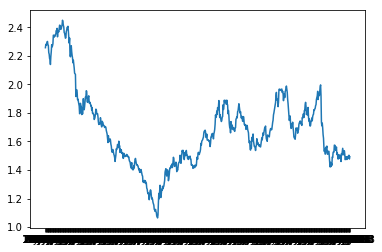

In [2]:
df = pd.read_csv('GBP_USD HistoricalData.csv', index_col = ['Date'])
df_price = df[:679+52]['Price']
plt.plot(df_price)
plt.show()

In [4]:
train = df_price[:679]
test = df_price[679:]

In [18]:
window_size = 7
def make_model(window_size):
    model = Sequential()
    model.add(Dense(window_size, input_dim=window_size, init="uniform",
    activation="relu"))
    model.add(Dense(6, init="uniform", activation="tanh"))
    model.add(Dense(1))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model = make_model(window_size)
min_max_scaler = preprocessing.MinMaxScaler()
train = np.array(train).reshape(-1,1)

train_scaled = min_max_scaler.fit_transform(train) 

train_X,train_Y = [],[]
for i in range(0 , len(train_scaled) - window_size):
    train_X.append(train_scaled[i:i+window_size])
    train_Y.append(train_scaled[i+window_size])

new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 48        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


/home/ec2-user/ml_module/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="uniform")`
  """
/home/ec2-user/ml_module/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="tanh", kernel_initializer="uniform")`
  


In [19]:
model.fit(new_train_X,new_train_Y, nb_epoch=2000, batch_size=512, validation_split = .05)

/home/ec2-user/ml_module/venv/lib64/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 638 samples, validate on 34 samples
Epoch 1/2000
638/638 [==============================] - 0s 170us/step - loss: 0.2441 - val_loss: 0.2467
Epoch 2/2000
638/638 [==============================] - 0s 10us/step - loss: 0.2331 - val_loss: 0.2347
Epoch 3/2000
638/638 [==============================] - 0s 7us/step - loss: 0.2220 - val_loss: 0.2225
Epoch 4/2000
638/638 [==============================] - 0s 11us/step - loss: 0.2107 - val_loss: 0.2100
Epoch 5/2000
638/638 [==============================] - 0s 10us/step - loss: 0.1993 - val_loss: 0.1974
Epoch 6/2000
638/638 [==============================] - 0s 9us/step - loss: 0.1879 - val_loss: 0.1847
Epoch 7/2000
638/638 [==============================] - 0s 8us/step - loss: 0.1761 - val_loss: 0.1718
Epoch 8/2000
638/638 [==============================] - 0s 14us/step - loss: 0.1644 - val_loss: 0.1589
Epoch 9/2000
638/638 [==============================] - 0s 12us/step - loss: 0.1524 - val_loss: 0.1459
Epoch 10/2000
638/638 [=======

Epoch 80/2000
638/638 [==============================] - 0s 9us/step - loss: 0.0051 - val_loss: 0.0057
Epoch 81/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0050 - val_loss: 0.0057
Epoch 82/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0049 - val_loss: 0.0056
Epoch 83/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0048 - val_loss: 0.0056
Epoch 84/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0047 - val_loss: 0.0056
Epoch 85/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0046 - val_loss: 0.0055
Epoch 86/2000
638/638 [==============================] - 0s 6us/step - loss: 0.0045 - val_loss: 0.0055
Epoch 87/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0044 - val_loss: 0.0055
Epoch 88/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0043 - val_loss: 0.0054
Epoch 89/2000
638/638 [==============================] - 0s 8us/step - lo

Epoch 159/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 160/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 161/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 162/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 163/2000
638/638 [==============================] - 0s 9us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 164/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 165/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 166/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 167/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0012 - val_loss: 0.0045
Epoch 168/2000
638/638 [==============================] - 0s 8us

638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0043
Epoch 238/2000
638/638 [==============================] - 0s 6us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 239/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 240/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 241/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 242/2000
638/638 [==============================] - 0s 6us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 243/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 244/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 245/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0042
Epoch 246/2000
638/638 [==============================] - 0s 7us/step - loss: 0

Epoch 316/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0010 - val_loss: 0.0040
Epoch 317/2000
638/638 [==============================] - 0s 8us/step - loss: 0.0010 - val_loss: 0.0041
Epoch 318/2000
638/638 [==============================] - 0s 7us/step - loss: 0.0010 - val_loss: 0.0041
Epoch 319/2000
638/638 [==============================] - 0s 7us/step - loss: 9.9991e-04 - val_loss: 0.0041
Epoch 320/2000
638/638 [==============================] - 0s 6us/step - loss: 9.9934e-04 - val_loss: 0.0041
Epoch 321/2000
638/638 [==============================] - 0s 8us/step - loss: 9.9880e-04 - val_loss: 0.0041
Epoch 322/2000
638/638 [==============================] - 0s 7us/step - loss: 9.9825e-04 - val_loss: 0.0041
Epoch 323/2000
638/638 [==============================] - 0s 7us/step - loss: 9.9787e-04 - val_loss: 0.0041
Epoch 324/2000
638/638 [==============================] - 0s 7us/step - loss: 9.9715e-04 - val_loss: 0.0041
Epoch 325/2000
638/638 [================

Epoch 392/2000
638/638 [==============================] - 0s 7us/step - loss: 9.5859e-04 - val_loss: 0.0039
Epoch 393/2000
638/638 [==============================] - 0s 8us/step - loss: 9.5772e-04 - val_loss: 0.0039
Epoch 394/2000
638/638 [==============================] - 0s 8us/step - loss: 9.5797e-04 - val_loss: 0.0039
Epoch 395/2000
638/638 [==============================] - 0s 9us/step - loss: 9.5799e-04 - val_loss: 0.0039
Epoch 396/2000
638/638 [==============================] - 0s 7us/step - loss: 9.5764e-04 - val_loss: 0.0039
Epoch 397/2000
638/638 [==============================] - 0s 7us/step - loss: 9.5668e-04 - val_loss: 0.0039
Epoch 398/2000
638/638 [==============================] - 0s 8us/step - loss: 9.5567e-04 - val_loss: 0.0039
Epoch 399/2000
638/638 [==============================] - 0s 7us/step - loss: 9.5427e-04 - val_loss: 0.0038
Epoch 400/2000
638/638 [==============================] - 0s 7us/step - loss: 9.5362e-04 - val_loss: 0.0038
Epoch 401/2000
638/638 [====

Epoch 468/2000
638/638 [==============================] - 0s 6us/step - loss: 9.1236e-04 - val_loss: 0.0037
Epoch 469/2000
638/638 [==============================] - 0s 8us/step - loss: 9.1447e-04 - val_loss: 0.0037
Epoch 470/2000
638/638 [==============================] - 0s 8us/step - loss: 9.1739e-04 - val_loss: 0.0037
Epoch 471/2000
638/638 [==============================] - 0s 7us/step - loss: 9.1727e-04 - val_loss: 0.0037
Epoch 472/2000
638/638 [==============================] - 0s 7us/step - loss: 9.1343e-04 - val_loss: 0.0037
Epoch 473/2000
638/638 [==============================] - 0s 7us/step - loss: 9.1049e-04 - val_loss: 0.0037
Epoch 474/2000
638/638 [==============================] - 0s 7us/step - loss: 9.0816e-04 - val_loss: 0.0036
Epoch 475/2000
638/638 [==============================] - 0s 8us/step - loss: 9.0771e-04 - val_loss: 0.0036
Epoch 476/2000
638/638 [==============================] - 0s 7us/step - loss: 9.1148e-04 - val_loss: 0.0036
Epoch 477/2000
638/638 [====

Epoch 544/2000
638/638 [==============================] - 0s 9us/step - loss: 8.6429e-04 - val_loss: 0.0035
Epoch 545/2000
638/638 [==============================] - 0s 8us/step - loss: 8.6479e-04 - val_loss: 0.0035
Epoch 546/2000
638/638 [==============================] - 0s 8us/step - loss: 8.6543e-04 - val_loss: 0.0035
Epoch 547/2000
638/638 [==============================] - 0s 8us/step - loss: 8.6453e-04 - val_loss: 0.0035
Epoch 548/2000
638/638 [==============================] - 0s 8us/step - loss: 8.6238e-04 - val_loss: 0.0034
Epoch 549/2000
638/638 [==============================] - 0s 7us/step - loss: 8.5973e-04 - val_loss: 0.0034
Epoch 550/2000
638/638 [==============================] - 0s 6us/step - loss: 8.6109e-04 - val_loss: 0.0033
Epoch 551/2000
638/638 [==============================] - 0s 6us/step - loss: 8.6217e-04 - val_loss: 0.0033
Epoch 552/2000
638/638 [==============================] - 0s 8us/step - loss: 8.6136e-04 - val_loss: 0.0034
Epoch 553/2000
638/638 [====

Epoch 620/2000
638/638 [==============================] - 0s 9us/step - loss: 8.1266e-04 - val_loss: 0.0032
Epoch 621/2000
638/638 [==============================] - 0s 8us/step - loss: 8.1310e-04 - val_loss: 0.0032
Epoch 622/2000
638/638 [==============================] - 0s 9us/step - loss: 8.1235e-04 - val_loss: 0.0032
Epoch 623/2000
638/638 [==============================] - 0s 9us/step - loss: 8.1014e-04 - val_loss: 0.0032
Epoch 624/2000
638/638 [==============================] - 0s 7us/step - loss: 8.0929e-04 - val_loss: 0.0031
Epoch 625/2000
638/638 [==============================] - 0s 7us/step - loss: 8.1123e-04 - val_loss: 0.0031
Epoch 626/2000
638/638 [==============================] - 0s 8us/step - loss: 8.1465e-04 - val_loss: 0.0031
Epoch 627/2000
638/638 [==============================] - 0s 6us/step - loss: 8.1567e-04 - val_loss: 0.0031
Epoch 628/2000
638/638 [==============================] - 0s 8us/step - loss: 8.1302e-04 - val_loss: 0.0031
Epoch 629/2000
638/638 [====

Epoch 696/2000
638/638 [==============================] - 0s 7us/step - loss: 7.6170e-04 - val_loss: 0.0029
Epoch 697/2000
638/638 [==============================] - 0s 7us/step - loss: 7.6010e-04 - val_loss: 0.0029
Epoch 698/2000
638/638 [==============================] - 0s 8us/step - loss: 7.5860e-04 - val_loss: 0.0030
Epoch 699/2000
638/638 [==============================] - 0s 9us/step - loss: 7.6008e-04 - val_loss: 0.0030
Epoch 700/2000
638/638 [==============================] - 0s 6us/step - loss: 7.5918e-04 - val_loss: 0.0030
Epoch 701/2000
638/638 [==============================] - 0s 7us/step - loss: 7.5676e-04 - val_loss: 0.0029
Epoch 702/2000
638/638 [==============================] - 0s 7us/step - loss: 7.5581e-04 - val_loss: 0.0029
Epoch 703/2000
638/638 [==============================] - 0s 8us/step - loss: 7.5781e-04 - val_loss: 0.0029
Epoch 704/2000
638/638 [==============================] - 0s 8us/step - loss: 7.5952e-04 - val_loss: 0.0029
Epoch 705/2000
638/638 [====

Epoch 772/2000
638/638 [==============================] - 0s 7us/step - loss: 7.0833e-04 - val_loss: 0.0027
Epoch 773/2000
638/638 [==============================] - 0s 8us/step - loss: 7.0780e-04 - val_loss: 0.0027
Epoch 774/2000
638/638 [==============================] - 0s 7us/step - loss: 7.0689e-04 - val_loss: 0.0027
Epoch 775/2000
638/638 [==============================] - 0s 7us/step - loss: 7.0678e-04 - val_loss: 0.0027
Epoch 776/2000
638/638 [==============================] - 0s 8us/step - loss: 7.0533e-04 - val_loss: 0.0027
Epoch 777/2000
638/638 [==============================] - 0s 7us/step - loss: 7.0591e-04 - val_loss: 0.0026
Epoch 778/2000
638/638 [==============================] - 0s 8us/step - loss: 7.0659e-04 - val_loss: 0.0027
Epoch 779/2000
638/638 [==============================] - 0s 8us/step - loss: 7.0437e-04 - val_loss: 0.0027
Epoch 780/2000
638/638 [==============================] - 0s 8us/step - loss: 7.0324e-04 - val_loss: 0.0027
Epoch 781/2000
638/638 [====

Epoch 848/2000
638/638 [==============================] - 0s 6us/step - loss: 6.5844e-04 - val_loss: 0.0025
Epoch 849/2000
638/638 [==============================] - 0s 8us/step - loss: 6.5758e-04 - val_loss: 0.0025
Epoch 850/2000
638/638 [==============================] - 0s 7us/step - loss: 6.5669e-04 - val_loss: 0.0025
Epoch 851/2000
638/638 [==============================] - 0s 8us/step - loss: 6.5583e-04 - val_loss: 0.0025
Epoch 852/2000
638/638 [==============================] - 0s 6us/step - loss: 6.5516e-04 - val_loss: 0.0024
Epoch 853/2000
638/638 [==============================] - 0s 7us/step - loss: 6.5437e-04 - val_loss: 0.0024
Epoch 854/2000
638/638 [==============================] - 0s 7us/step - loss: 6.5368e-04 - val_loss: 0.0025
Epoch 855/2000
638/638 [==============================] - 0s 7us/step - loss: 6.5352e-04 - val_loss: 0.0025
Epoch 856/2000
638/638 [==============================] - 0s 7us/step - loss: 6.5257e-04 - val_loss: 0.0024
Epoch 857/2000
638/638 [====

Epoch 924/2000
638/638 [==============================] - 0s 6us/step - loss: 6.1305e-04 - val_loss: 0.0023
Epoch 925/2000
638/638 [==============================] - 0s 7us/step - loss: 6.1142e-04 - val_loss: 0.0022
Epoch 926/2000
638/638 [==============================] - 0s 7us/step - loss: 6.1033e-04 - val_loss: 0.0022
Epoch 927/2000
638/638 [==============================] - 0s 9us/step - loss: 6.0999e-04 - val_loss: 0.0022
Epoch 928/2000
638/638 [==============================] - 0s 7us/step - loss: 6.1003e-04 - val_loss: 0.0022
Epoch 929/2000
638/638 [==============================] - 0s 8us/step - loss: 6.0856e-04 - val_loss: 0.0022
Epoch 930/2000
638/638 [==============================] - 0s 7us/step - loss: 6.0667e-04 - val_loss: 0.0022
Epoch 931/2000
638/638 [==============================] - 0s 9us/step - loss: 6.0822e-04 - val_loss: 0.0023
Epoch 932/2000
638/638 [==============================] - 0s 7us/step - loss: 6.0738e-04 - val_loss: 0.0022
Epoch 933/2000
638/638 [====

Epoch 1000/2000
638/638 [==============================] - 0s 7us/step - loss: 5.6719e-04 - val_loss: 0.0020
Epoch 1001/2000
638/638 [==============================] - 0s 8us/step - loss: 5.6665e-04 - val_loss: 0.0020
Epoch 1002/2000
638/638 [==============================] - 0s 7us/step - loss: 5.6600e-04 - val_loss: 0.0020
Epoch 1003/2000
638/638 [==============================] - 0s 8us/step - loss: 5.6617e-04 - val_loss: 0.0021
Epoch 1004/2000
638/638 [==============================] - 0s 7us/step - loss: 5.6874e-04 - val_loss: 0.0021
Epoch 1005/2000
638/638 [==============================] - 0s 7us/step - loss: 5.6924e-04 - val_loss: 0.0021
Epoch 1006/2000
638/638 [==============================] - 0s 7us/step - loss: 5.6662e-04 - val_loss: 0.0020
Epoch 1007/2000
638/638 [==============================] - 0s 8us/step - loss: 5.6376e-04 - val_loss: 0.0020
Epoch 1008/2000
638/638 [==============================] - 0s 8us/step - loss: 5.6418e-04 - val_loss: 0.0020
Epoch 1009/2000
638

638/638 [==============================] - 0s 9us/step - loss: 5.3119e-04 - val_loss: 0.0018
Epoch 1076/2000
638/638 [==============================] - 0s 7us/step - loss: 5.3189e-04 - val_loss: 0.0018
Epoch 1077/2000
638/638 [==============================] - 0s 7us/step - loss: 5.3081e-04 - val_loss: 0.0018
Epoch 1078/2000
638/638 [==============================] - 0s 7us/step - loss: 5.2864e-04 - val_loss: 0.0019
Epoch 1079/2000
638/638 [==============================] - 0s 7us/step - loss: 5.3335e-04 - val_loss: 0.0019
Epoch 1080/2000
638/638 [==============================] - 0s 8us/step - loss: 5.3251e-04 - val_loss: 0.0018
Epoch 1081/2000
638/638 [==============================] - 0s 8us/step - loss: 5.2780e-04 - val_loss: 0.0018
Epoch 1082/2000
638/638 [==============================] - 0s 7us/step - loss: 5.3066e-04 - val_loss: 0.0018
Epoch 1083/2000
638/638 [==============================] - 0s 8us/step - loss: 5.3445e-04 - val_loss: 0.0018
Epoch 1084/2000
638/638 [==========

638/638 [==============================] - 0s 7us/step - loss: 5.0290e-04 - val_loss: 0.0018
Epoch 1151/2000
638/638 [==============================] - 0s 8us/step - loss: 5.1127e-04 - val_loss: 0.0018
Epoch 1152/2000
638/638 [==============================] - 0s 9us/step - loss: 5.0868e-04 - val_loss: 0.0017
Epoch 1153/2000
638/638 [==============================] - 0s 8us/step - loss: 5.0169e-04 - val_loss: 0.0017
Epoch 1154/2000
638/638 [==============================] - 0s 9us/step - loss: 5.0186e-04 - val_loss: 0.0017
Epoch 1155/2000
638/638 [==============================] - 0s 8us/step - loss: 5.0131e-04 - val_loss: 0.0017
Epoch 1156/2000
638/638 [==============================] - 0s 9us/step - loss: 5.0023e-04 - val_loss: 0.0017
Epoch 1157/2000
638/638 [==============================] - 0s 9us/step - loss: 5.0125e-04 - val_loss: 0.0017
Epoch 1158/2000
638/638 [==============================] - 0s 7us/step - loss: 4.9963e-04 - val_loss: 0.0017
Epoch 1159/2000
638/638 [==========

638/638 [==============================] - 0s 7us/step - loss: 4.8062e-04 - val_loss: 0.0016
Epoch 1226/2000
638/638 [==============================] - 0s 7us/step - loss: 4.8052e-04 - val_loss: 0.0016
Epoch 1227/2000
638/638 [==============================] - 0s 7us/step - loss: 4.7976e-04 - val_loss: 0.0016
Epoch 1228/2000
638/638 [==============================] - 0s 8us/step - loss: 4.8074e-04 - val_loss: 0.0016
Epoch 1229/2000
638/638 [==============================] - 0s 7us/step - loss: 4.7984e-04 - val_loss: 0.0016
Epoch 1230/2000
638/638 [==============================] - 0s 7us/step - loss: 4.7907e-04 - val_loss: 0.0016
Epoch 1231/2000
638/638 [==============================] - 0s 7us/step - loss: 4.8018e-04 - val_loss: 0.0016
Epoch 1232/2000
638/638 [==============================] - 0s 7us/step - loss: 4.8055e-04 - val_loss: 0.0016
Epoch 1233/2000
638/638 [==============================] - 0s 7us/step - loss: 4.7930e-04 - val_loss: 0.0016
Epoch 1234/2000
638/638 [==========

638/638 [==============================] - 0s 6us/step - loss: 4.6456e-04 - val_loss: 0.0015
Epoch 1301/2000
638/638 [==============================] - 0s 8us/step - loss: 4.6631e-04 - val_loss: 0.0015
Epoch 1302/2000
638/638 [==============================] - 0s 7us/step - loss: 4.6556e-04 - val_loss: 0.0015
Epoch 1303/2000
638/638 [==============================] - 0s 8us/step - loss: 4.6371e-04 - val_loss: 0.0015
Epoch 1304/2000
638/638 [==============================] - 0s 8us/step - loss: 4.6658e-04 - val_loss: 0.0015
Epoch 1305/2000
638/638 [==============================] - 0s 7us/step - loss: 4.6694e-04 - val_loss: 0.0015
Epoch 1306/2000
638/638 [==============================] - 0s 8us/step - loss: 4.6281e-04 - val_loss: 0.0016
Epoch 1307/2000
638/638 [==============================] - 0s 8us/step - loss: 4.6788e-04 - val_loss: 0.0016
Epoch 1308/2000
638/638 [==============================] - 0s 7us/step - loss: 4.7087e-04 - val_loss: 0.0015
Epoch 1309/2000
638/638 [==========

638/638 [==============================] - 0s 8us/step - loss: 4.5263e-04 - val_loss: 0.0014
Epoch 1376/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5235e-04 - val_loss: 0.0014
Epoch 1377/2000
638/638 [==============================] - 0s 9us/step - loss: 4.5452e-04 - val_loss: 0.0014
Epoch 1378/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5262e-04 - val_loss: 0.0015
Epoch 1379/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5355e-04 - val_loss: 0.0015
Epoch 1380/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5640e-04 - val_loss: 0.0015
Epoch 1381/2000
638/638 [==============================] - 0s 7us/step - loss: 4.5221e-04 - val_loss: 0.0014
Epoch 1382/2000
638/638 [==============================] - 0s 6us/step - loss: 4.5779e-04 - val_loss: 0.0014
Epoch 1383/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5426e-04 - val_loss: 0.0015
Epoch 1384/2000
638/638 [==========

638/638 [==============================] - 0s 8us/step - loss: 4.4807e-04 - val_loss: 0.0014
Epoch 1451/2000
638/638 [==============================] - 0s 7us/step - loss: 4.4572e-04 - val_loss: 0.0014
Epoch 1452/2000
638/638 [==============================] - 0s 8us/step - loss: 4.4454e-04 - val_loss: 0.0014
Epoch 1453/2000
638/638 [==============================] - 0s 6us/step - loss: 4.4390e-04 - val_loss: 0.0014
Epoch 1454/2000
638/638 [==============================] - 0s 6us/step - loss: 4.4254e-04 - val_loss: 0.0014
Epoch 1455/2000
638/638 [==============================] - 0s 7us/step - loss: 4.4423e-04 - val_loss: 0.0014
Epoch 1456/2000
638/638 [==============================] - 0s 8us/step - loss: 4.4590e-04 - val_loss: 0.0014
Epoch 1457/2000
638/638 [==============================] - 0s 7us/step - loss: 4.4430e-04 - val_loss: 0.0014
Epoch 1458/2000
638/638 [==============================] - 0s 8us/step - loss: 4.4393e-04 - val_loss: 0.0014
Epoch 1459/2000
638/638 [==========

638/638 [==============================] - 0s 8us/step - loss: 4.3706e-04 - val_loss: 0.0014
Epoch 1526/2000
638/638 [==============================] - 0s 7us/step - loss: 4.3830e-04 - val_loss: 0.0014
Epoch 1527/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3612e-04 - val_loss: 0.0014
Epoch 1528/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3786e-04 - val_loss: 0.0014
Epoch 1529/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3623e-04 - val_loss: 0.0014
Epoch 1530/2000
638/638 [==============================] - 0s 6us/step - loss: 4.3662e-04 - val_loss: 0.0014
Epoch 1531/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3719e-04 - val_loss: 0.0014
Epoch 1532/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3543e-04 - val_loss: 0.0014
Epoch 1533/2000
638/638 [==============================] - 0s 7us/step - loss: 4.3483e-04 - val_loss: 0.0013
Epoch 1534/2000
638/638 [==========

638/638 [==============================] - 0s 6us/step - loss: 4.4179e-04 - val_loss: 0.0014
Epoch 1601/2000
638/638 [==============================] - 0s 7us/step - loss: 4.2665e-04 - val_loss: 0.0013
Epoch 1602/2000
638/638 [==============================] - 0s 7us/step - loss: 4.4703e-04 - val_loss: 0.0013
Epoch 1603/2000
638/638 [==============================] - 0s 7us/step - loss: 4.6835e-04 - val_loss: 0.0013
Epoch 1604/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2867e-04 - val_loss: 0.0014
Epoch 1605/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5170e-04 - val_loss: 0.0014
Epoch 1606/2000
638/638 [==============================] - 0s 8us/step - loss: 4.4535e-04 - val_loss: 0.0013
Epoch 1607/2000
638/638 [==============================] - 0s 8us/step - loss: 4.3042e-04 - val_loss: 0.0013
Epoch 1608/2000
638/638 [==============================] - 0s 8us/step - loss: 4.5198e-04 - val_loss: 0.0013
Epoch 1609/2000
638/638 [==========

638/638 [==============================] - 0s 9us/step - loss: 4.3006e-04 - val_loss: 0.0013
Epoch 1676/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2653e-04 - val_loss: 0.0013
Epoch 1677/2000
638/638 [==============================] - 0s 9us/step - loss: 4.2414e-04 - val_loss: 0.0013
Epoch 1678/2000
638/638 [==============================] - 0s 7us/step - loss: 4.2477e-04 - val_loss: 0.0013
Epoch 1679/2000
638/638 [==============================] - 0s 9us/step - loss: 4.2272e-04 - val_loss: 0.0014
Epoch 1680/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2686e-04 - val_loss: 0.0013
Epoch 1681/2000
638/638 [==============================] - 0s 9us/step - loss: 4.2602e-04 - val_loss: 0.0013
Epoch 1682/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2281e-04 - val_loss: 0.0013
Epoch 1683/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2548e-04 - val_loss: 0.0013
Epoch 1684/2000
638/638 [==========

638/638 [==============================] - 0s 7us/step - loss: 4.2246e-04 - val_loss: 0.0013
Epoch 1751/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1965e-04 - val_loss: 0.0013
Epoch 1752/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1957e-04 - val_loss: 0.0013
Epoch 1753/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1780e-04 - val_loss: 0.0013
Epoch 1754/2000
638/638 [==============================] - 0s 9us/step - loss: 4.1863e-04 - val_loss: 0.0013
Epoch 1755/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1801e-04 - val_loss: 0.0013
Epoch 1756/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1922e-04 - val_loss: 0.0013
Epoch 1757/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1819e-04 - val_loss: 0.0013
Epoch 1758/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1745e-04 - val_loss: 0.0013
Epoch 1759/2000
638/638 [==========

638/638 [==============================] - 0s 8us/step - loss: 4.1233e-04 - val_loss: 0.0012
Epoch 1826/2000
638/638 [==============================] - 0s 6us/step - loss: 4.2271e-04 - val_loss: 0.0012
Epoch 1827/2000
638/638 [==============================] - 0s 6us/step - loss: 4.2394e-04 - val_loss: 0.0013
Epoch 1828/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1351e-04 - val_loss: 0.0013
Epoch 1829/2000
638/638 [==============================] - 0s 8us/step - loss: 4.2607e-04 - val_loss: 0.0013
Epoch 1830/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1385e-04 - val_loss: 0.0012
Epoch 1831/2000
638/638 [==============================] - 0s 7us/step - loss: 4.2028e-04 - val_loss: 0.0012
Epoch 1832/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1605e-04 - val_loss: 0.0013
Epoch 1833/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1646e-04 - val_loss: 0.0013
Epoch 1834/2000
638/638 [==========

638/638 [==============================] - 0s 9us/step - loss: 4.0868e-04 - val_loss: 0.0013
Epoch 1901/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0980e-04 - val_loss: 0.0013
Epoch 1902/2000
638/638 [==============================] - 0s 7us/step - loss: 4.0955e-04 - val_loss: 0.0012
Epoch 1903/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1152e-04 - val_loss: 0.0012
Epoch 1904/2000
638/638 [==============================] - 0s 7us/step - loss: 4.0888e-04 - val_loss: 0.0013
Epoch 1905/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1389e-04 - val_loss: 0.0013
Epoch 1906/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1113e-04 - val_loss: 0.0012
Epoch 1907/2000
638/638 [==============================] - 0s 8us/step - loss: 4.1410e-04 - val_loss: 0.0012
Epoch 1908/2000
638/638 [==============================] - 0s 7us/step - loss: 4.1394e-04 - val_loss: 0.0013
Epoch 1909/2000
638/638 [==========

638/638 [==============================] - 0s 8us/step - loss: 4.0671e-04 - val_loss: 0.0012
Epoch 1976/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0516e-04 - val_loss: 0.0012
Epoch 1977/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0514e-04 - val_loss: 0.0013
Epoch 1978/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0658e-04 - val_loss: 0.0013
Epoch 1979/2000
638/638 [==============================] - 0s 7us/step - loss: 4.0727e-04 - val_loss: 0.0013
Epoch 1980/2000
638/638 [==============================] - 0s 7us/step - loss: 4.0605e-04 - val_loss: 0.0012
Epoch 1981/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0554e-04 - val_loss: 0.0012
Epoch 1982/2000
638/638 [==============================] - 0s 7us/step - loss: 4.0502e-04 - val_loss: 0.0012
Epoch 1983/2000
638/638 [==============================] - 0s 8us/step - loss: 4.0531e-04 - val_loss: 0.0012
Epoch 1984/2000
638/638 [==========

In [20]:
test = list(test)

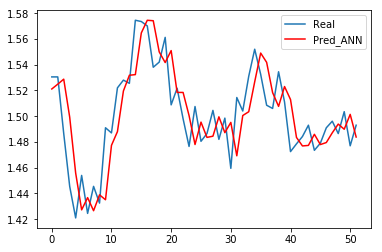

Test MSE: 0.00059


In [21]:
test_extended = train.tolist()[-1*window_size:] + test
test_data = []
for i in test_extended:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data).reshape(-1,1)
test_scaled = min_max_scaler.fit_transform(test_data)
test_X,test_Y = [],[]
for i in range(0 , len(test_scaled) - window_size):
    test_X.append(test_scaled[i:i+window_size])
    test_Y.append(test_scaled[i+window_size])
    new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)
#new_test_X = np.reshape(new_test_X, (new_test_X.shape[0], new_test_X.shape[1], 1))
predictions = model.predict(new_test_X)
predictions_rescaled=min_max_scaler.inverse_transform(predictions)
Y = pd.DataFrame(test)
pred = pd.DataFrame(predictions_rescaled)
plt.plot(Y,label = 'Real')
plt.plot(pred , color = 'r', label = 'Pred_ANN')
#p.plot()
plt.legend()
plt.show()
error = mse(test,predictions_rescaled)
print('Test MSE: %.5f' % error)

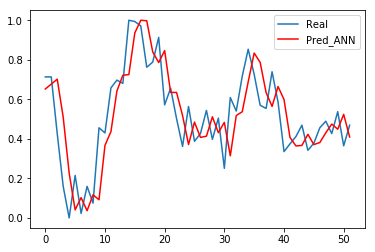

Test MSE: 0.024878
Test MAE 0.128383


In [22]:
plt.plot(test_scaled[-52:],label = 'Real')
plt.plot(predictions, color = 'r', label = 'Pred_ANN')
#p.plot()
plt.legend()
plt.show()
error = mse(test_scaled[-52:], predictions)
print('Test MSE: %.6f' % error)
error = mae(test_scaled[-52:], predictions)
print('Test MAE %.6f' % error)

In [23]:
np.savetxt(str(window_size) + 'bpusd_train_X.csv', new_train_X)
np.savetxt(str(window_size) + 'bpusd_train_Y.csv', new_train_Y)
np.savetxt(str(window_size) + 'bpusd_test_X.csv', new_test_X)
np.savetxt(str(window_size) + 'bpusd_predictions_ann.csv', predictions)
np.savetxt(str(window_size) + 'bpusd_test_Y.csv', test_scaled[-14:])